<a href="https://colab.research.google.com/github/jananisree-a-s/SCT_DS_2/blob/main/Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Upload your ZIP dataset file (e.g., archive.zip)


Saving archive.zip to archive (5).zip
✔️ Files extracted to → /content/data

📂 Loaded CSV File: StudentsPerformance.csv



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

📌 Checking Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



🔎 Column Names:
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


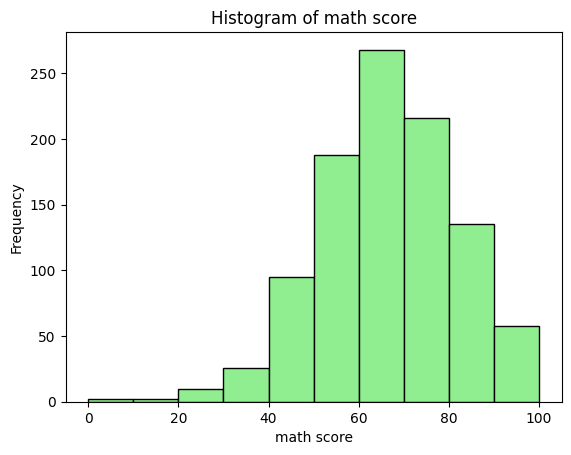

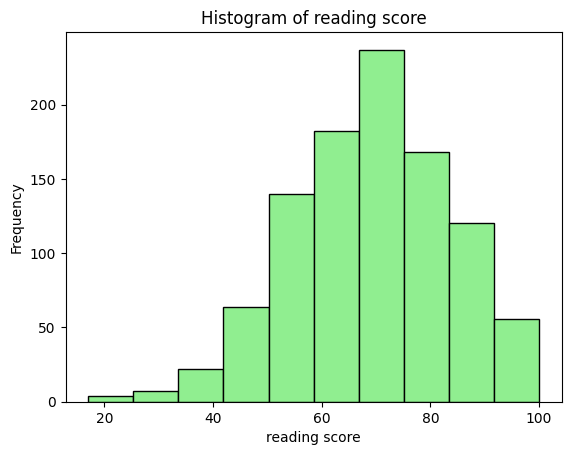

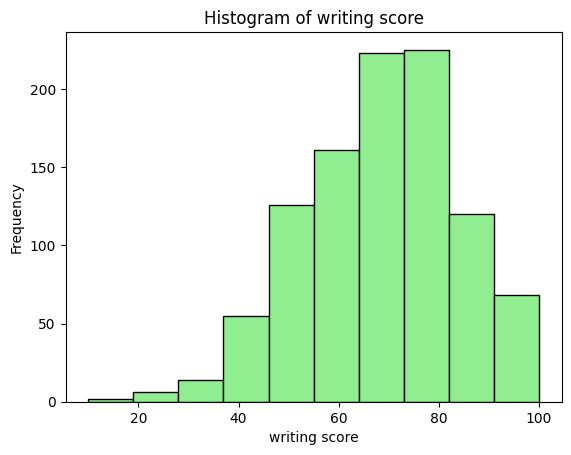

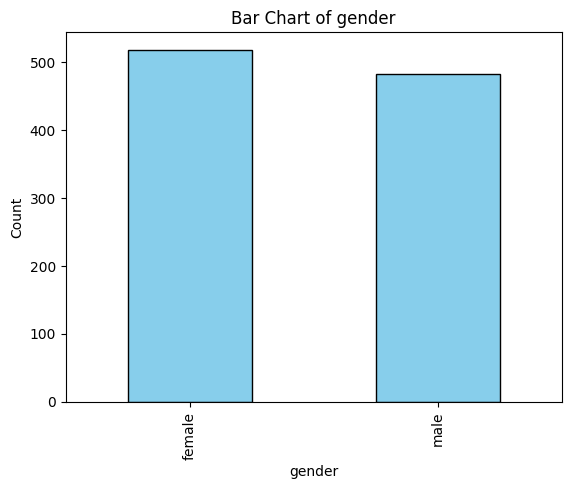

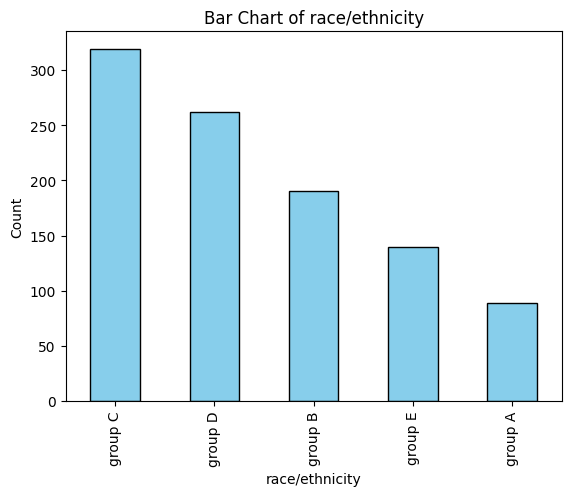

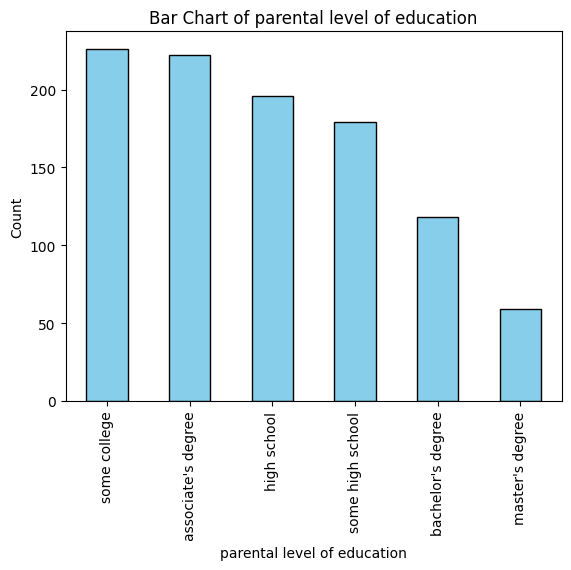

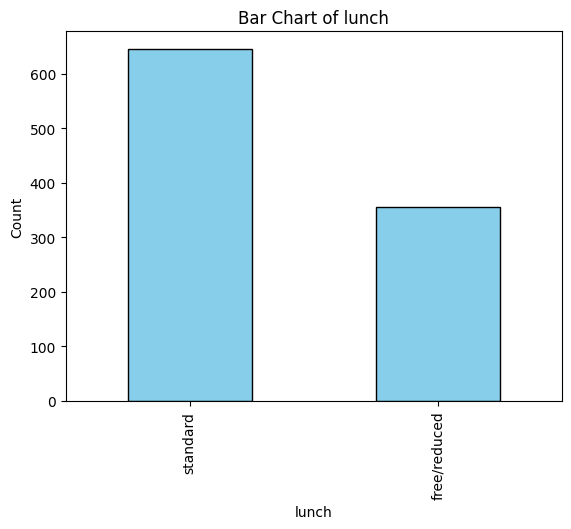

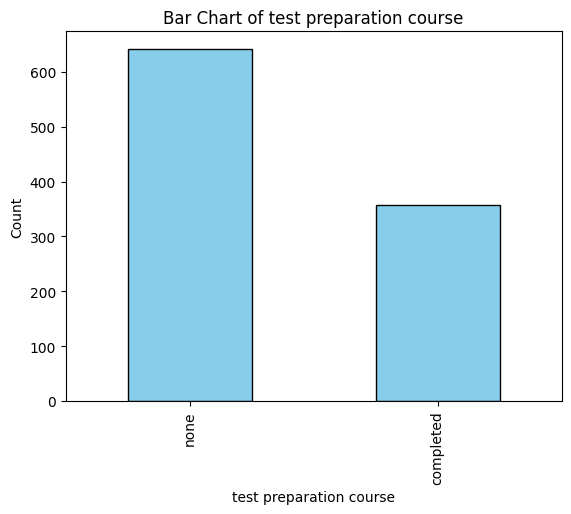

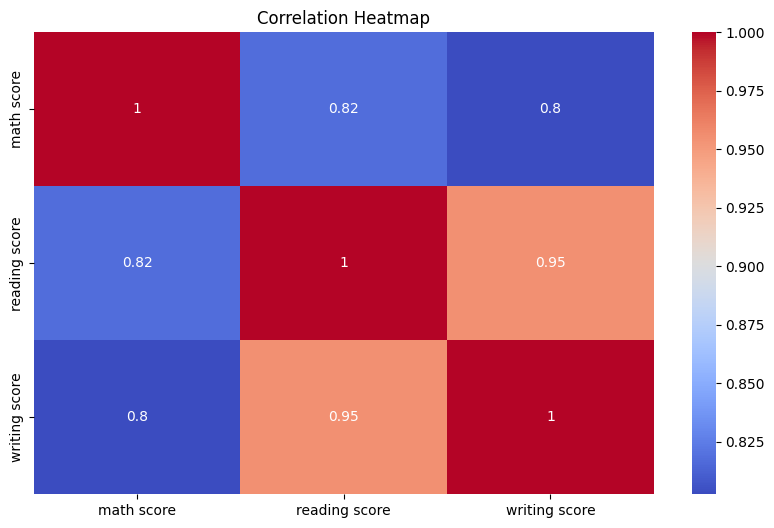

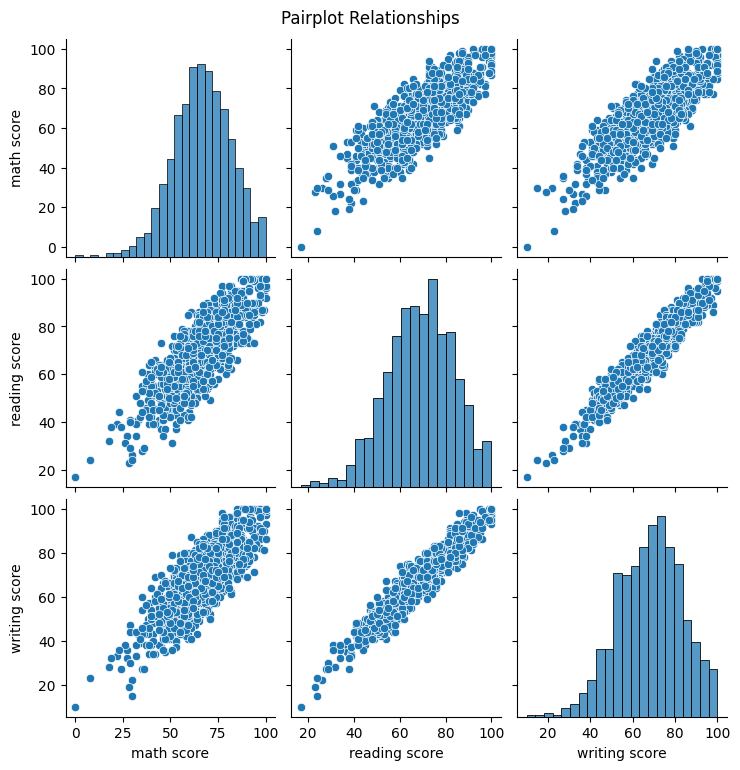


🎯 EDA Completed Successfully!


In [12]:

from google.colab import files
import zipfile, io, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("📌 Upload your ZIP dataset file (e.g., archive.zip)")
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]

# STEP 2: Extract ZIP
zip_ref = zipfile.ZipFile(io.BytesIO(uploaded[zip_file_name]), 'r')
zip_ref.extractall("/content/data")
zip_ref.close()
print("✔️ Files extracted to → /content/data")

# STEP 3: Load the FIRST CSV in the ZIP Automatically
csv_files = [f for f in os.listdir("/content/data") if f.endswith(".csv")]
df = pd.read_csv("/content/data/" + csv_files[0])
print(f"\n📂 Loaded CSV File: {csv_files[0]}\n")
display(df.head())

print("\n🔍 Dataset Info:")
df.info()

print("\n📌 Checking Missing Values:")
print(df.isna().sum())

# Fill numeric missing values with mean
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("\n✨ Missing values handled!")

# Remove duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"🧽 Removed {before - after} duplicate rows")

print("\n📌 Descriptive Statistics:")
display(df.describe())

print("\n🔎 Column Names:")
print(df.columns.tolist())

# Distribution of Numeric Columns
for col in numeric_cols:
    plt.figure()
    df[col].plot(kind='hist', bins=10, edgecolor='black', color='lightgreen')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Bar Charts for Categorical Columns
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

if len(numeric_cols) > 1:
    plt.figure(figsize=(10,6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

# Pairplot to explore relationships
if len(numeric_cols) > 1:
    sns.pairplot(df[numeric_cols])
    plt.suptitle("Pairplot Relationships", y=1.02)
    plt.show()

print("\n🎯 EDA Completed Successfully!")
